In [1]:
import time
import pandas as pd
import numpy as np
from copy import deepcopy
import sys
import os
import csv
from itertools import cycle
import warnings
from itertools import cycle
from scipy import sparse
import matplotlib.pyplot as plt
# Suppress all warnings
warnings.filterwarnings("ignore")
# warnings.resetwarnings() # To change it back (optional)

sys.path.append("/nobackup/gogandhi/alt_means_sans_k/")

from scripts.similarity_scores import get_scores,clustering_method_values
from scripts.nets_and_embeddings import *

In [2]:
#net_n~
net_file = "/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/net_n~10000_k~10_tau~3_tau2~1_minc~50_mu~0.10_sample~0.npz"
#node_n~
node_file = "/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/node_n~10000_k~10_tau~3_tau2~1_minc~50_mu~0.10_sample~0.npz"
#n~
emb_file = "/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/n~10000_k~10_tau~3_tau2~1_minc~50_mu~0.10_sample~0_model_name~node2vec_window_length~10_dim~64.npz"

net = sparse.load_npz(net_file)
node_table = pd.read_csv(node_file)
node_table = node_table.rename(columns={'membership': 'community_id'})
emb = np.load(emb_file)["emb"]


In [32]:
for mu in mu_values:
    for sample in samples:
        print(mu,sample)
        node_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/node_n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}.npz"
        #n~
        emb_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}_model_name~node2vec_window_length~10_dim~64.npz"

        node_table = pd.read_csv(node_file)
        node_table = node_table.rename(columns={'membership': 'community_id'})
        emb = np.load(emb_file)["emb"]

0.1 3


FileNotFoundError: [Errno 2] No such file or directory: '/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/n~10000_k~10_tau~3_tau2~1_minc~50_mu~0.10_sample~3_model_name~node2vec_window_length~10_dim~64.npz'

In [5]:
# Node2vec uses dot similarity metric (|u||v|cos(theta))
# Kmeans uses euclidean distance (sqrt({ux - vx}**2 + {uy - vy}**2))
# Our proposed algorithm uses dot similarity like node2vec

# How different do the results come if we streamline this metric?
# What if we just change kmeans from euclidean to dot? 
# Does that defeat the purpose of this algo?

In [29]:
mu_values = np.round(np.arange(0.10, 1.05, 0.05),decimals=2)
samples = np.arange(3,10)
score_keys=["kmeans","proposed"]
device_names = [f"cuda:{i}" for i in [0,1,2,3]]  # ['cuda:0', 'cuda:1', 'cuda:2', 'cuda:3']

# We can snakemake this easily._
#kmeans_curve = {}
#proposed_curve = {}
for mu in mu_values:
    start_time = time.perf_counter()
    scores_kmeans = []
    scores_proposed = []
    for sample, device_name in zip(samples,cycle(device_names)):
        start_time_run = time.perf_counter()
        #net_n~
        #net_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/net_n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}.npz"
        #node_n~
        node_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/node_n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}.npz"
        #n~
        emb_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}_model_name~node2vec_window_length~10_dim~64.npz"

        #net = sparse.load_npz(net_file)
        node_table = pd.read_csv(node_file)
        node_table = node_table.rename(columns={'membership': 'community_id'})
        emb = np.load(emb_file)["emb"]
        scores = (clustering_method_values(None, node_table, emb, score_keys, device_name))

        scores_kmeans.append(scores['kmeans'])
        scores_proposed.append(scores['proposed'])
        
        print(f"Sample: {sample} in ",time.perf_counter()- start_time_run)
    print(f"mu: {mu} in ", time.perf_counter()- start_time)
    proposed_curve[mu].append(scores_proposed)
    kmeans_curve[mu].append(scores_kmeans)

FileNotFoundError: [Errno 2] No such file or directory: '/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/n~10000_k~10_tau~3_tau2~1_minc~50_mu~0.10_sample~3_model_name~node2vec_window_length~10_dim~64.npz'

In [26]:
samples = np.arange(3,10)
samples

array([3, 4, 5, 6, 7, 8, 9])

{0.1: [0.9911158100759764, 0.99899173733894, 0.9890827407592244],
 0.15: [0.9964545676240777, 0.9954249251800459, 0.9942843743297342],
 0.2: [0.9813107172452334, 0.9726433521201681, 0.9769356006977264],
 0.25: [0.9701754366320952, 0.9515796155701174, 0.9758274392840749],
 0.3: [0.9137335441532639, 0.9303432171026014, 0.917922607615509],
 0.35: [0.8723363978458984, 0.8694611274357668, 0.8997484763543578],
 0.4: [0.8375348572297783, 0.8130680893816759, 0.8319611591701898],
 0.45: [0.6458214120273413, 0.7076484400508883, 0.7429867214922738],
 0.5: [0.5311694263444217, 0.4339286255005286, 0.48711117372400714],
 0.55: [0.31637146773203234, 0.349050564796278, 0.3231469905747328],
 0.6: [0.13359550718325583, 0.14516702795695266, 0.12469114644877992],
 0.65: [0.03583933661118059, 0.032192897958245606, 0.029497075515642283],
 0.7: [0.014807752462034952, 0.016853824854565963, 0.014099203761615355],
 0.75: [0.011177018169361685, 0.010917808695257459, 0.011038776662815622],
 0.8: [0.00984119702681

In [16]:
kmeans_curve

{0.1: [0.9627155786507738, 0.9511047949797368, 0.9487214629436206],
 0.15: [0.9290829524456693, 0.9396985259385389, 0.9490375244406694],
 0.2: [0.9324730708467714, 0.9038004379912885, 0.9282586055410741],
 0.25: [0.9361481489696184, 0.9238631379183281, 0.9408474966791643],
 0.3: [0.9300221543370392, 0.9189866766126963, 0.9629664448721712],
 0.35: [0.8903538152596097, 0.9338118715011897, 0.945740369121951],
 0.4: [0.9083186831521304, 0.9355889857749616, 0.9438157608645801],
 0.45: [0.9398673554509696, 0.8956188107796511, 0.9011645936392281],
 0.5: [0.8885214560319938, 0.8757147021658386, 0.868542491525863],
 0.55: [0.7476848194436218, 0.7319550688174956, 0.7721925906019077],
 0.6: [0.4885171532164063, 0.49293337702828743, 0.5185747784293475],
 0.65: [0.091166769012811, 0.0892619972294351, 0.07590794931640193],
 0.7: [0.020914207547888884, 0.03005950817571956, 0.018958111558418367],
 0.75: [0.012090322020238742, 0.011710063319077878, 0.011314045991338718],
 0.8: [0.008916303348764502, 0.

Text(0.5, 1.0, 'Runs: 3 | Nodes: 10000 | $\\tau$: 3.0 | $<k>$: 10')

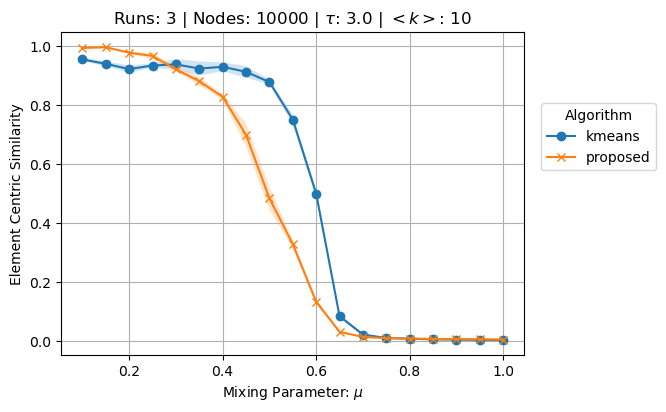

In [36]:

# plt.plot(mu_values, l1,'-x',label='kmeans')
# plt.plot(mu_values, l2,'-o',label = 'proposed')

plt.figure(figsize=(7,4))

l1=[]
l2=[]
l1_std=[]
l2_std=[]
for i in mu_values:
    l1.append(np.mean(kmeans_curve[i]))
    l2.append(np.mean(proposed_curve[i]))
    l1_std.append(np.std(kmeans_curve[i]))
    l2_std.append(np.std(proposed_curve[i]))
    
l1 = np.array(l1)
l2 = np.array(l2)
l1_std = np.array(l1_std)
l2_std = np.array(l2_std)
plt.plot(mu_values,l1, '-o',label="kmeans")
plt.plot(mu_values,l2, '-x',label="proposed")
plt.fill_between(mu_values, l1 - l1_std,l1 + l1_std, alpha=0.2)
plt.fill_between(mu_values, l2 - l2_std,l2 + l2_std, alpha=0.2)

plt.xlabel(r'Mixing Parameter: $\mu$')
plt.ylabel('Element Centric Similarity')
plt.legend(title="Algorithm", loc='upper right', bbox_to_anchor=(1.3, 0.8))
plt.grid(True)
plt.tight_layout()

plt.title(rf'Runs: {3} | Nodes: {10000} | $\tau$: {3.0} | $<k>$: {10}')


In [9]:
mu_values = np.round(np.arange(0.10, 1.05, 0.05),decimals=2)
np.set_printoptions(formatter={'float': '{:0.2f}'.format})
mu_values

array([0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60,
       0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00])

In [ ]:
import time
import pandas as pd
import numpy as np
from copy import deepcopy
import sys
import os
import csv
from itertools import cycle
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
# warnings.resetwarnings() # To change it back (optional)

sys.path.append("/nobackup/gogandhi/alt_means_sans_k/")

from scripts.similarity_scores import get_scores



def process_and_save_result(run_no, mu, path_name, score_keys, device_name, emb_params, params,csv_file_path):
    start_time = time.perf_counter()

    if not os.path.isdir(f"{path_name}/Run_{run_no}/"):
        os.mkdir(f"{path_name}/Run_{run_no}/")

    params['mu'] = mu
    result_run_mu = get_scores(params, emb_params, score_keys, f"{path_name}/Run_{run_no}/", device_name)
    
    with open(csv_file_path, 'a', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow([run_no, mu] + [result_run_mu[key] for key in score_keys])
        
    elapsed_time = time.perf_counter() - start_time
    
    print(run_no,mu,elapsed_time)
    return run_no, mu, result_run_mu

def save_accumulated_results(results, pathname, score_keys):
    for run_no, mu, result_run_mu in results:
        df = pd.DataFrame.from_dict(result_run_mu, orient='index')
        df.reset_index(inplace=True)
        df.columns = ['mu'] + list(df.columns[1:])
        df.to_csv(f"{pathname}/Run_{run_no}/mu_{mu:.2f}_change.csv", index=False)

accumulator = []  # List to accumulate results for each run and mu


num_cores = 10

path_name = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori"

#################### End of Params #################

csv_file_path = path_name + "/result_stream.csv"

print("Hello, you can find results at:\n",path_name)

with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['run_no', 'mu'] + score_keys)

for sample in samples:
    start_time = time.perf_counter()

    for mu, device_name in zip(mu_values, cycle(device_names)):
        start_time_run = time.perf_counter()
        #net_n~
        net_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/net_n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}.npz"
        #node_n~
        node_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/node_n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}.npz"
        #n~
        emb_file = f"/nobackup/gogandhi/alt_means_sans_k/data/lfr_sadamori/n~10000_k~10_tau~3_tau2~1_minc~50_mu~{mu:.2f}_sample~{sample}_model_name~node2vec_window_length~10_dim~64.npz"

        net = sparse.load_npz(net_file)
        node_table = pd.read_csv(node_file)
        node_table = node_table.rename(columns={'membership': 'community_id'})
        emb = np.load(emb_file)["emb"]
        scores = (clustering_method_values(net, node_table, emb, score_keys, device_name))

        with open(csv_file_path, 'a', newline='') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerow([sample, mu] + [scores[key] for key in score_keys])
        print(f"Mu {mu}: ", time.perf_counter() - start_time_run)
    print(f"Run took: {time.perf_counter() - start_time}, avg time per mu_val: {(time.perf_counter() - start_time)/len(mu_values)}")